In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import KFold
import csv
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import random
import re

In [2]:
from collections import defaultdict

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
os.chdir("/content/gdrive/MyDrive/ColabNotebooks/ClassificationCarsML")

In [5]:
data_path = "/content/gdrive/MyDrive/ColabNotebooks/ClassificationCarsML/sharePublic/Public"
dataset_path = "/content/gdrive/MyDrive/ColabNotebooks/ClassificationCarsML/Public"
col_name = ['ImageFullPath', 'CategoryID']
car_brands = ('Others', 'Honda', 'Hyundai', 'KIA', 'Mazda', 'Mitsubishi', 'Suzuki', 'Toyota', 'VinFast')
categories_id = {
    'Others': 0,
    'Honda': 1,
    'Hyundai': 2,
    'KIA': 3,
    'Mazda': 4,
    'Mitsubishi': 5,
    'Suzuki': 6,
    'Toyota': 7,
    'VinFast': 8,
}

# TẠO CÁC TẬP DỮ LIỆU TRAIN, TEST (SPLITS)


---





In [6]:
import imghdr

In [16]:
X = []
y = []
temp_X = defaultdict(list)
wrong_name_count = 0
wrong_extension_count = 0
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
categories=['Others', 'Honda', 'Hyundai', 'KIA', 'Mazda', 'Mitsubishi', 'Suzuki', 'Toyota', 'VinFast']
mssv_pattern = r'(\d{8}(?:-\d{8})*)'
categories_pattern = '|'.join(categories)
file_extension_pattern = r'\.\d+\.(jpg|jpeg|png)$'
accepted_filename = re.compile(fr'{mssv_pattern}\.({categories_pattern}){file_extension_pattern}')

for category in os.listdir(data_path):
    if category not in categories: continue
    category_path = os.path.join(data_path, category)
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            if not os.path.exists(os.path.join(category_path, image_name)):
                print(f'Not exists this directory: {os.path.join(category_path, image_name)}')
                continue
            match_name = accepted_filename.match(image_name)
            if not match_name:
                wrong_name_count += 1
                continue
            image_path = os.path.join(category_path, image_name)
            img_type = imghdr.what(image_path)
            if img_type is None:
                wrong_extension_count += 1
                continue
            elif img_type not in img_type_accepted_by_tf:
                wrong_extension_count += 1
                continue
            _, car_category, _ = match_name.groups()
            if car_category in categories:
              X.append(os.path.join(car_category, image_name))
              y.append(categories_id[category])
              temp_X[car_category].append(image_name)

In [17]:
print(f'Wrong name: {wrong_name_count}')
print(f'Wrong extension: {wrong_extension_count}')

Wrong name: 1304
Wrong extension: 3463


In [46]:
backupX = X.copy()
backupy = y.copy()

In [66]:
len(X)

32115

In [48]:
len(backupX)

33276

In [67]:
#Split thành nhiều dataset
NumSplits = 5
kf = KFold(n_splits=NumSplits, shuffle=True, random_state=42)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  train_file_path = os.path.join(dataset_path, f'CarDataset-Splits-{i+1}-Train.csv')
  test_file_path = os.path.join(dataset_path, f'CarDataset-Splits-{i+1}-Test.csv')
  with open(train_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(col_name)
    for item in train_index:
      writer.writerow([X[item], y[item]])
  with open(test_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(col_name)
    for item in test_index:
      writer.writerow([X[item], y[item]])

In [68]:
#Dataset tổng
cardataset_path = os.path.join(dataset_path, 'CarDataset.csv')
car_dataset = pd.DataFrame({col_name[0]: X, col_name[1]: y})
car_dataset.to_csv(cardataset_path, index=False)

In [69]:
df = pd.read_csv(os.path.join(dataset_path, 'CarDataset.csv'))
df

,ImageFullPath,CategoryID
0,Honda/22520394-22520395.Honda.100.jpg,1
1,Honda/22520394-22520395.Honda.52.jpg,1
2,Honda/22520394-22520395.Honda.110.jpg,1
3,Honda/22520394-22520395.Honda.82.jpg,1
4,Honda/22520394-22520395.Honda.57.jpg,1
...,...,...
32110,VinFast/22521027-22520195-22521060.VinFast.102...,8
32111,VinFast/22521027-22520195-22521060.VinFast.102...,8
32112,VinFast/22521027-22520195-22521060.VinFast.102...,8
32113,VinFast/22521027-22520195-22521060.VinFast.102...,8


In [39]:
list_not_exists = []
for element in X:
  if not os.path.exists(os.path.join(data_path, element)):
    list_not_exists.append(element)
    print(element)
    print(df.loc[df['ImageFullPath'] == f'{element}', 'CategoryID'].values[0])
for element in list_not_exists:
  X.remove(element)
  y.remove(df.loc[df['ImageFullPath'] == f'{element}', 'CategoryID'].values[0])

In [45]:
temp_X

defaultdict(list,
            {'Honda': ['22520394-22520395.Honda.100.jpg',
              '22520394-22520395.Honda.52.jpg',
              '22520394-22520395.Honda.110.jpg',
              '22520394-22520395.Honda.82.jpg',
              '22520394-22520395.Honda.57.jpg',
              '22520394-22520395.Honda.112.jpg',
              '22520394-22520395.Honda.80.jpg',
              '22520394-22520395.Honda.133.jpg',
              '22520394-22520395.Honda.107.jpg',
              '22520394-22520395.Honda.77.jpg',
              '22520394-22520395.Honda.65.jpg',
              '22520394-22520395.Honda.137.jpg',
              '22520394-22520395.Honda.114.jpg',
              '22520779-22521587.Honda.58.jpg',
              '22520779-22521587.Honda.53.jpg',
              '22520779-22521587.Honda.44.jpg',
              '22520779-22521587.Honda.26.jpg',
              '22520779-22521587.Honda.55.jpg',
              '22520779-22521587.Honda.25.jpg',
              '22520779-22521587.Honda.35.jpg',
      

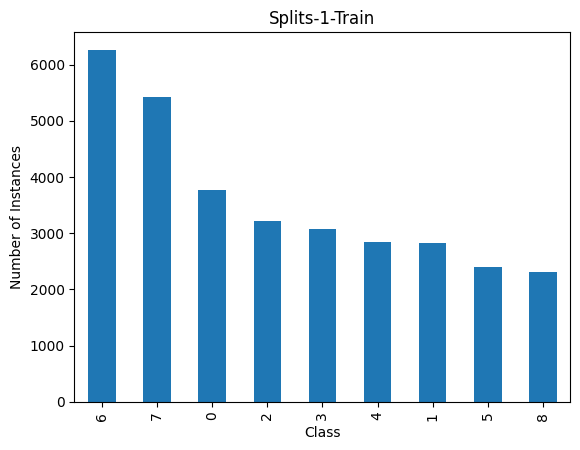

In [70]:
class_counts = df[col_name[1]].value_counts()
class_counts.plot(kind='bar')
plt.title('Splits-1-Train')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

# THỐNG KÊ DỮ LIỆU
---


In [ ]:
def check_valid_file_name(filename):
    try:
        filename = filename.lower().split('.')
        if len(filename) != 4 or filename[-1] not in ['jpg', 'jpeg', 'png']:
            return None, None, None
        mssv, brand, order = filename[0], filename[1], filename[2]
        contributes = mssv.split('-')
        num_pattern = r'^\d+$'
        if not re.match(num_pattern, order):
            return None, None, None
        valid_contributes = contributes.copy()
        for contribute in contributes:
            if not re.match(num_pattern, contribute):
                return None, None, None
            if len(contribute) != 8:
                valid_contributes.remove(contribute)
        return valid_contributes, brand, order
    except Exception as e:
      print(f'Error occurred while processing file {filename}: {e}')
      return None, None, None

In [ ]:
student_total_brands = defaultdict(float)
student_per_brand = defaultdict(lambda: defaultdict(float))

for car_brand in car_brands:
    brand_path = os.path.join(data_path, car_brand)
    for entry in os.scandir(brand_path):
        if entry.is_file():
            filename = entry.name
            contributes, brand, order = check_valid_file_name(filename)
            if contributes is None:
                continue
            brand = brand.title()
            if brand not in car_brands:
                brand = 'Others'
            contribute_weight = 1 / len(contributes)
            for contribute in contributes:
                student_total_brands[contribute] += contribute_weight
                student_per_brand[contribute][brand] += contribute_weight

In [ ]:
import json

In [ ]:
print(json.dumps(student_total_brands, indent=4))

{
    "22520394": 1683.5,
    "22520395": 1683.5,
    "22521560": 249.5,
    "22521614": 249.5,
    "21522500": 507.5,
    "21522771": 507.5,
    "22521492": 377.0,
    "22521599": 377.0,
    "22520348": 158.0000000000001,
    "22520530": 158.0000000000001,
    "22520837": 158.0000000000001,
    "22521692": 620.0,
    "22521676": 620.0,
    "22520779": 1360.5,
    "22521587": 1360.5,
    "22521425": 73.0,
    "22520318": 73.0,
    "22521463": 114.66666666666612,
    "22521213": 114.66666666666612,
    "22521259": 114.66666666666612,
    "22520459": 1259.6666666666595,
    "22520507": 1259.6666666666595,
    "22520862": 1259.6666666666595,
    "22521586": 723.0,
    "22521559": 723.0,
    "22521070": 1230.0,
    "22520211": 1230.0,
    "22521342": 999.5,
    "22520970": 999.5,
    "22520477": 289.0,
    "22520490": 289.0,
    "22521027": 3989.666666667363,
    "22520195": 3989.666666667363,
    "22521060": 3989.666666667363,
    "21522373": 350.0,
    "21522499": 351.0,
    "22520521": 

In [ ]:
print(json.dumps(student_per_brand, indent=4))

{
    "22520394": {
        "Others": 576.0,
        "Honda": 193.5,
        "Hyundai": 126.5,
        "Mazda": 160.5,
        "Mitsubishi": 211.0,
        "Suzuki": 233.0,
        "Toyota": 183.0
    },
    "22520395": {
        "Others": 576.0,
        "Honda": 193.5,
        "Hyundai": 126.5,
        "Mazda": 160.5,
        "Mitsubishi": 211.0,
        "Suzuki": 233.0,
        "Toyota": 183.0
    },
    "22521560": {
        "Others": 72.5,
        "Honda": 24.0,
        "Hyundai": 25.0,
        "Mazda": 27.5,
        "Mitsubishi": 22.0,
        "Suzuki": 26.5,
        "Toyota": 52.0
    },
    "22521614": {
        "Others": 72.5,
        "Honda": 24.0,
        "Hyundai": 25.0,
        "Mazda": 27.5,
        "Mitsubishi": 22.0,
        "Suzuki": 26.5,
        "Toyota": 52.0
    },
    "21522500": {
        "Others": 117.5,
        "Honda": 80.5,
        "Hyundai": 100.0,
        "Mazda": 18.0,
        "Mitsubishi": 24.0,
        "Suzuki": 83.5,
        "Toyota": 84.0
    },
    "21

# Hiển thị nhiều ảnh
---



In [ ]:
def display_random_car(data, root_path, num_img_per_row=10, img_height=1.5, img_width=1.5):
    cars_brand_set = {0 : 'Others', 1 : 'Honda', 2 : 'Hyundai', 3 : 'KIA',
                    4 : 'Mazda', 5 : 'Mitsubishi', 6 : 'Suzuki',
                    7 : 'Toyota', 8 : 'VinFast'}
    group_data = data.groupby(col_name[1])
    category_ids = group_data.groups.keys()
    num_categories = len(category_ids)
    w_ratios = [2] + [1 for _ in range(num_img_per_row)]
    h_space = 0.1
    w_space = 0.1
    w_size = img_width * sum(w_ratios) + w_space * (len(w_ratios) - 1)
    h_size = img_height * num_categories + h_space * (num_categories - 1)
    fig, axes = plt.subplots(nrows=num_categories, ncols=num_img_per_row + 1,
                           figsize=(w_size, h_size),
                           gridspec_kw={'width_ratios': w_ratios, 'wspace' : w_space, 'hspace' : h_space})
    for i, category_id in enumerate(category_ids):
        brand_name = cars_brand_set[category_id]
        axes[i,0].text(0, 0.5, f'{brand_name}', ha = 'left', va = 'center', fontsize = img_width * 15, fontweight='bold')
        image_paths = group_data.get_group(category_id)[col_name[0]].tolist()
        random_sample = random.sample(image_paths, num_img_per_row)

        for j, image_path in enumerate(random_sample):
            random_path = os.path.join(root_path, image_path)
            img = Image.open(random_path)
            axes[i,j+1].imshow(img, aspect='auto')
            axes[i,j+1].axis('off')
        axes[i,0].axis('off')
    plt.show()

In [ ]:
df = pd.read_csv(dataset_path + '/CarDataset.csv')
display_random_car(df, data_path)

Output hidden; open in https://colab.research.google.com to view.

# Clustering
---



In [52]:
import pandas as pd
import tensorflow as tf
import torch
from torchvision.transforms import ToTensor
import cv2
import torch
from sklearn.cluster import DBSCAN
from tensorflow.keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision.transforms import ToTensor, Compose, Resize
from math import ceil
from tensorflow.keras.applications import MobileNet
from PIL import Image, UnidentifiedImageError
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Flatten

In [53]:
model = MobileNet(weights="imagenet", include_top=False, pooling="avg")

<ipython-input-53-fb61bcce3659>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNet(weights="imagenet", include_top=False, pooling="avg")


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [54]:
car_dataset = pd.read_csv(dataset_path + '/CarDataset.csv')

In [57]:
car_dataset

,ImageFullPath,CategoryID
0,Honda/22520394-22520395.Honda.100.jpg,1
1,Honda/22520394-22520395.Honda.52.jpg,1
2,Honda/22520394-22520395.Honda.110.jpg,1
3,Honda/22520394-22520395.Honda.82.jpg,1
4,Honda/22520394-22520395.Honda.57.jpg,1
...,...,...
33271,VinFast/22521027-22520195-22521060.VinFast.102...,8
33272,VinFast/22521027-22520195-22521060.VinFast.102...,8
33273,VinFast/22521027-22520195-22521060.VinFast.102...,8
33274,VinFast/22521027-22520195-22521060.VinFast.102...,8


In [56]:
def display_cluster_images(cluster_id, image_paths, brand, n_cols=5):
    print(f"Cluster {cluster_id} - Brand: {brand}")
    n_images = len(image_paths)
    n_rows = ceil(n_images/n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
    axes = axes.flatten()
    for i, image_path in enumerate(image_paths):
        try:
            image_path = data_path + f'/{brand}/{image_path}'
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis("off")
            axes[i].set_title(os.path.basename(image_path), fontsize=8)

        except Exception as e:
            axes[i].axis("off")
            print(f'Error occurred while loading image {image_path}: {e}')
        for j in range(i + 1, len(axes)):
                axes[j].axis("off")
    plt.tight_layout()
    plt.show()

In [59]:
import sys
car_brands = ('Others', 'Honda', 'Hyundai', 'KIA', 'Mazda', 'Mitsubishi', 'Suzuki', 'Toyota', 'VinFast')
X = car_dataset[col_name[0]].tolist()
y = car_dataset[col_name[1]].tolist()
all_results = []
for brand in car_brands:
    features = []
    valid_paths = []
    file_dir = os.path.join(data_path, brand)
    print(f'Processing brand: {brand}')
    #Force the output display immediately
    sys.stdout.flush()
    for file in os.listdir(file_dir):
        valid_img_path = os.path.join(brand, file)
        if not valid_img_path in car_dataset[col_name[0]].values:
            continue
        img_path = os.path.join(file_dir, file)
        try:
            img = Image.open(img_path)
            img = img.convert('RGB').resize((224,224))
            img_array = preprocess_input(np.array(img))
            img_array = np.expand_dims(img_array, axis=0)
            feature = model(img_array)
            feature = tf.keras.layers.Flatten()(feature)
            if feature is None:
                continue
            feature = tf.squeeze(feature, axis = 0)
            features.append(feature)
            valid_paths.append(file)
        except (UnidentifiedImageError, IOError):
            continue
    features = np.array(features)
    print(f'Processed brand: {brand}, Shape: {features.shape}')
    dbscan = DBSCAN(eps=5, min_samples=2, metric='euclidean')
    clusters = dbscan.fit_predict(features)
    cluster_df = pd.DataFrame({
        col_name[0]: valid_paths,
        "cluster_id": clusters
    })
    duplicate_clusters = cluster_df[cluster_df["cluster_id"] != -1].groupby("cluster_id")

    print(f'Brand: {brand}, Number of clusters: {len(duplicate_clusters)}')
    for cluster_id, group in duplicate_clusters:
        cluster_images = group[col_name[0]].tolist()
        display_cluster_images(cluster_id, cluster_images, brand)
        sub_image_path = cluster_images[0]
        for image_path in cluster_images:
            all_results.append({
                col_name[0]: image_path,
                'Brand': brand,
                'ClusterID': cluster_id,
            })
            if sub_image_path == image_path:
                continue
            image_path = f'{brand}/{image_path}'
            if image_path in X:
                X.remove(image_path)
                y.remove(categories_id[brand])


Output hidden; open in https://colab.research.google.com to view.

In [60]:
import pandas as pd
result_df = pd.DataFrame(all_results)
output_csv = dataset_path + '/cluster_results.csv'
result_df.to_csv(output_csv, index=False)
result_df.to_csv(output_csv, index=False)
print(f'Cluster results saved to {output_csv}')

Cluster results saved to /content/gdrive/MyDrive/ColabNotebooks/ClassificationCarsML/Public/cluster_results.csv


In [62]:
result_df

,ImageFullPath,Brand,ClusterID
0,22520779-22521587.Others.948.jpg,Others,0
1,22521070-22520211.Others.167.jpg,Others,0
2,22521425-22520318.Others.5.jpg,Others,1
3,22521463-22521213-22521259.Others.26.jpg,Others,1
4,22521425-22520318.Others.6.jpg,Others,2
...,...,...,...
2142,22520459-22520507-22520862.VinFast.22.jpg,VinFast,195
2143,22520521-22520884.VinFast.3.jpg,VinFast,196
2144,22520521-22520884.VinFast.4.jpg,VinFast,196
2145,22521027-22520195-22521060.VinFast.0012.jpg,VinFast,197


In [64]:
len(X)

32115

In [65]:
len(y)

32115

# New